
<h2><center> Time Series Analysis </center></h2>


Time series Analysis:
==================================================================
It is a set of observation taken at specified times usually at equal intervals.
It is used to predict the future valuesbased on the previous observed values.
Components in time Series:
* 1.Trend 
* 2.Seasonality
* 3.Irregularity
* 4.Cyclic



How to Check Stationarity:
=================================================================
* 1.Rolling Statistics
* 2.ADF Test


ARIMA Model:
================================================================

* AR -Auto Regressive
* MA -Moving Average
* I-Intergation



In [1]:
import warnings
import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt
%matplotlib inline  
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [2]:
plt.rcParams['figure.figsize']=(12,4)
plt.rcParams['axes.grid']=True
plt.rcParams['font.size']=14

In [3]:
df = pd.read_csv(r"C:\Users\ADMIN\Desktop\TPTNt\Minor Projects\AirPassengers.csv")
# Parse strings to datetime type
df['Month'] = pd.to_datetime(df['Month'], infer_datetime_format=True) 
indexedDataset = df.set_index(['Month'])

In [4]:
from datetime import datetime
indexedDataset.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## Exploring the Dataset

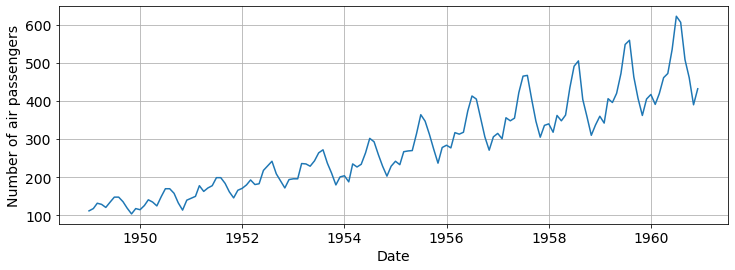

In [5]:
## plot graph
plt.xlabel("Date")
plt.ylabel("Number of air passengers")
plt.plot(indexedDataset)

#### Finding the Rolling Mean & Rolling Standard Deviation:

In [6]:
#Determing rolling statistics
rolmean = indexedDataset.rolling(window=12).mean() 
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean, rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


### Checking Stationarity with Rolling Mean and Standard Deviation 

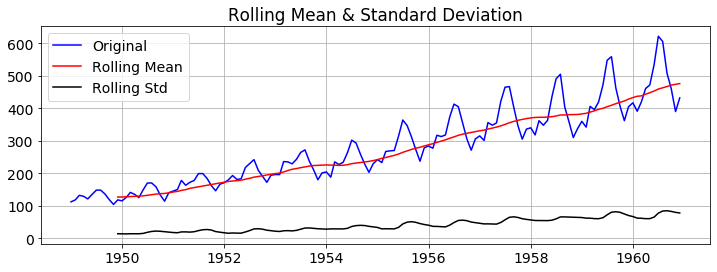

In [7]:
#Plot rolling statistics:
orig = plt.plot(indexedDataset, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

### Checking Stationarity using Dickey-Fuller test

In [8]:
#Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(indexedDataset['#Passengers'], autolag='AIC') 

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


### Wrappping Visual and statistical Functions in a single function

In [9]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['#Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

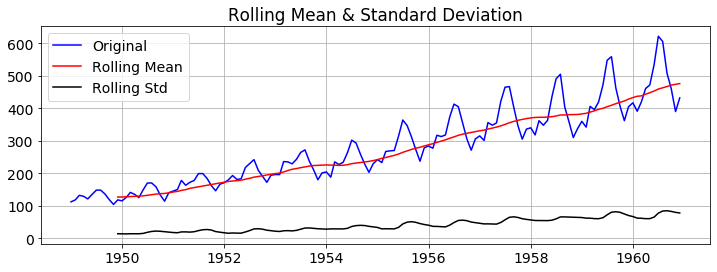

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [10]:
test_stationarity(indexedDataset)

### Converting Non Stationary data to Stationary dataset
- Log
- Subtracting Simple Rolling Averages
- Subtracting Exponential Rolling Averages
- Subtarcting previous value with shift()
- Seasonal Decomposition
- Combination of all the above

### Log 

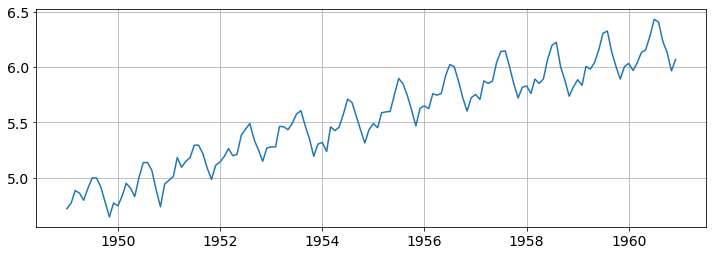

In [11]:
#Estimating trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

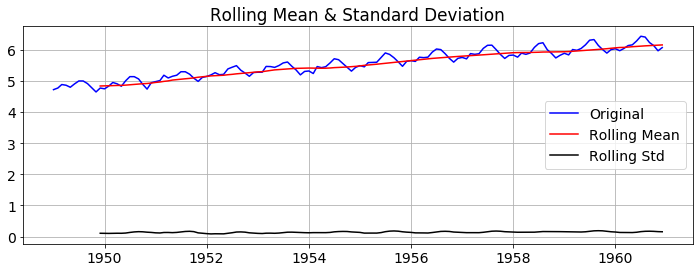

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [12]:
test_stationarity(indexedDataset_logScale)

### Subtracting Simple Rolling Averages

In [13]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
dataset_LogScale_Minus_Moving_Average=indexedDataset_logScale-movingAverage
dataset_LogScale_Minus_Moving_Average.head(12)

#Removing Nan values
dataset_LogScale_Minus_Moving_Average.dropna(inplace=True)
dataset_LogScale_Minus_Moving_Average.head(10)


,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


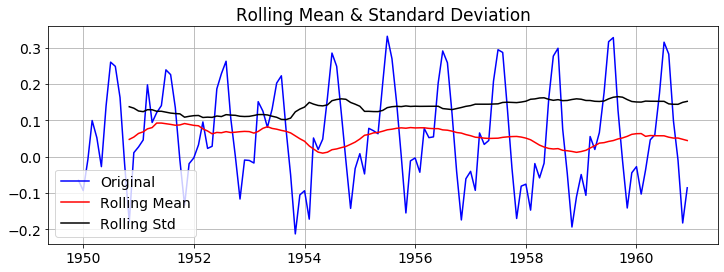

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [14]:
test_stationarity(dataset_LogScale_Minus_Moving_Average)

### Difference Exponential Moving Average

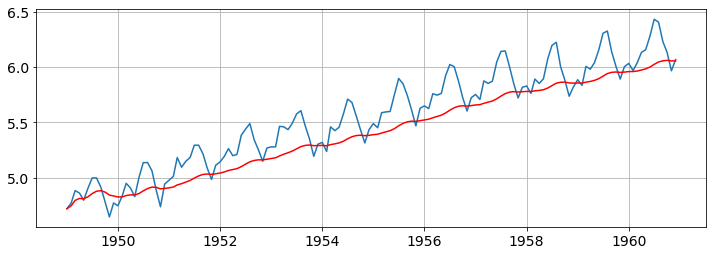

In [15]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')
plt.show()

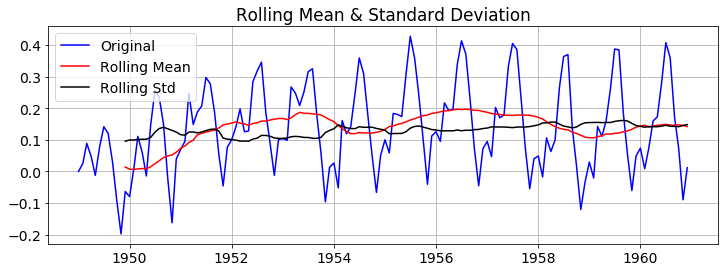

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [16]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

### Differencing Previous Value

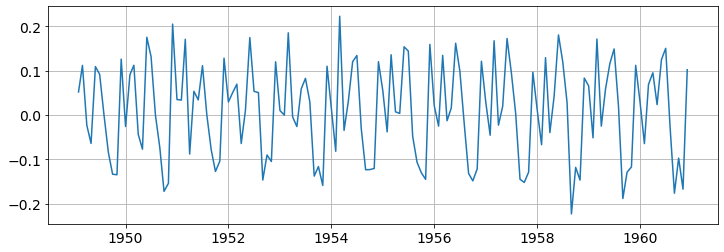

In [17]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)
plt.show()

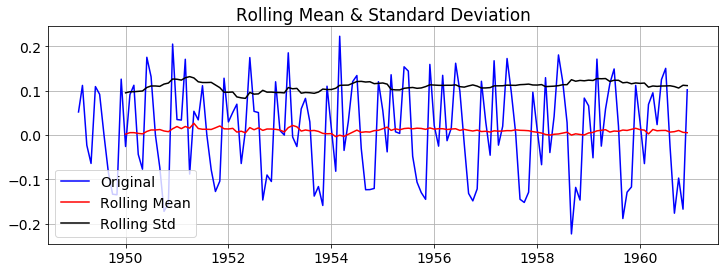

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [18]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

### Seasonal Decomposition

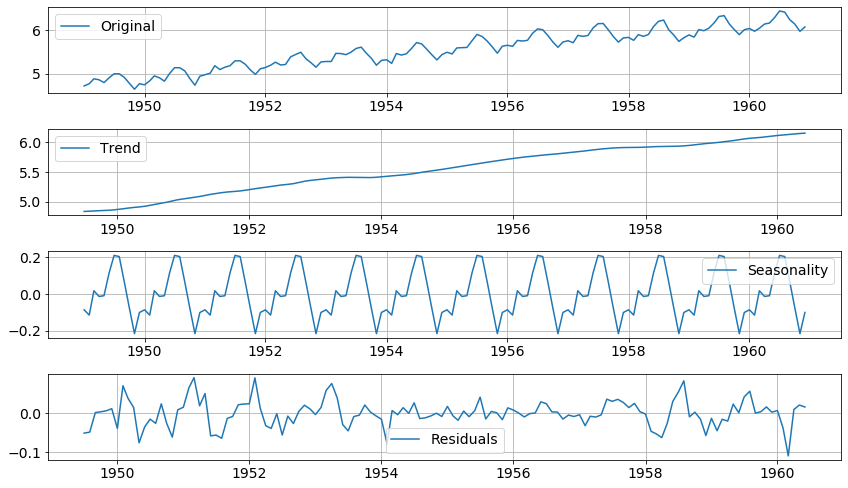

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(12,7))
plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [20]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)

In [21]:
#Determing rolling statistics
rolmean = decomposedLogData.rolling(window=12).mean() 
rolstd = decomposedLogData.rolling(window=12).std()
print(rolmean, rolstd)

Month
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
                ...   
1960-02-01    0.006082
1960-03-01   -0.001657
1960-04-01    0.000797
1960-05-01    0.000595
1960-06-01    0.001801
Name: resid, Length: 132, dtype: float64 Month
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
                ...   
1960-02-01    0.025642
1960-03-01    0.041773
1960-04-01    0.041432
1960-05-01    0.041322
1960-06-01    0.041542
Name: resid, Length: 132, dtype: float64


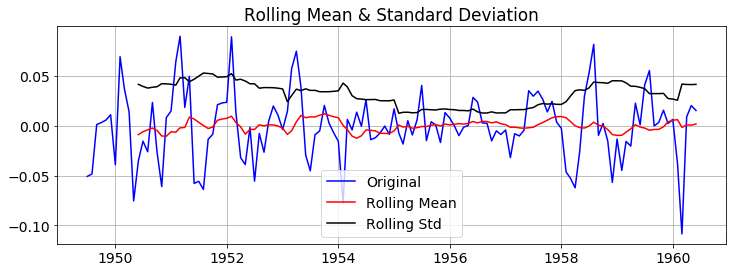

In [22]:
#Plot rolling statistics:
orig = plt.plot(decomposedLogData, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [23]:
decomposedLogData.head() 

Month
1949-07-01   -0.050884
1949-08-01   -0.048415
1949-09-01    0.001223
1949-10-01    0.003156
1949-11-01    0.005749
Name: resid, dtype: float64

In [24]:
df1=pd.DataFrame(decomposedLogData)

In [25]:
df1

,resid
Month,
1949-07-01,-0.050884
1949-08-01,-0.048415
1949-09-01,0.001223
1949-10-01,0.003156
1949-11-01,0.005749
...,...
1960-02-01,-0.038032
1960-03-01,-0.108624
1960-04-01,0.009006


In [26]:
#Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df1['resid'], autolag='AIC') 


dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


### Finding Args of AR and MA models

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


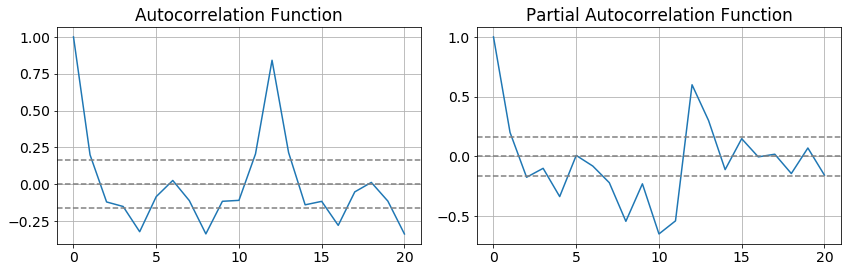

In [27]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf


lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')


#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [28]:
from statsmodels.tsa.stattools import arma_order_select_ic

In [29]:
arma_order_select_ic(datasetLogDiffShifting)

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


{'bic':             0           1           2
 0 -225.639206 -228.618781 -228.527575
 1 -226.497365 -229.756336 -250.375467
 2 -225.753257 -255.336986 -269.503740
 3 -222.137562 -252.308121 -249.418687
 4 -232.957928 -253.670744 -253.229736,
 'bic_min_order': (2, 2)}

## AR Model

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


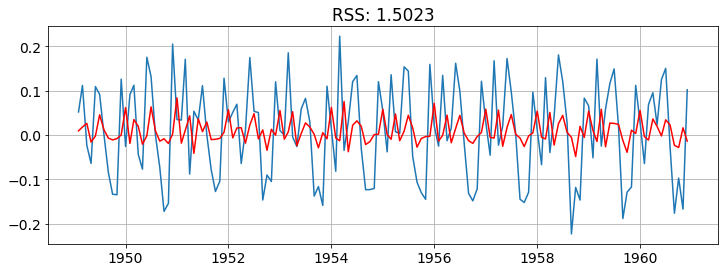

In [30]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model = ARIMA(indexedDataset_logScale, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting["#Passengers"])**2))
print('Plotting AR model')

### MA Model

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


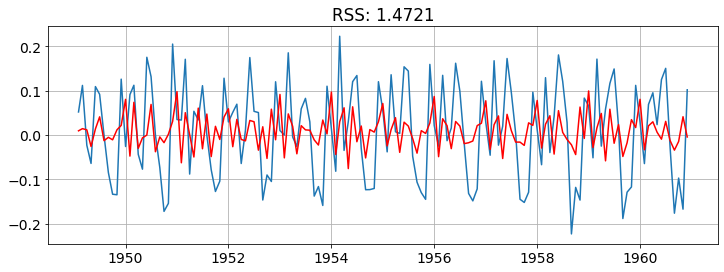

In [31]:
#MA MODEL
model = ARIMA(indexedDataset_logScale, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting["#Passengers"])**2))
print('Plotting AR model')

### ARIMA Model

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.0292')

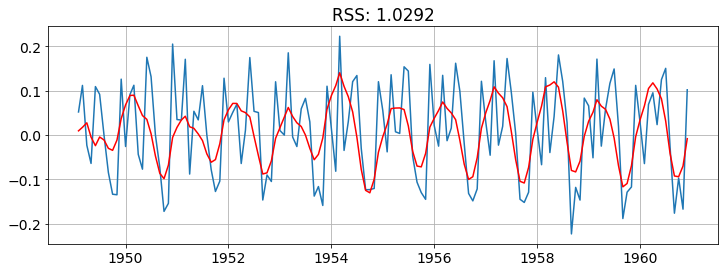

In [32]:
model = ARIMA(indexedDataset_logScale, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting["#Passengers"])**2))

### Getting Predictions

In [33]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


### Converting Log diffrenced values to original form:

In [34]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [35]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['#Passengers'].iloc[0], index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

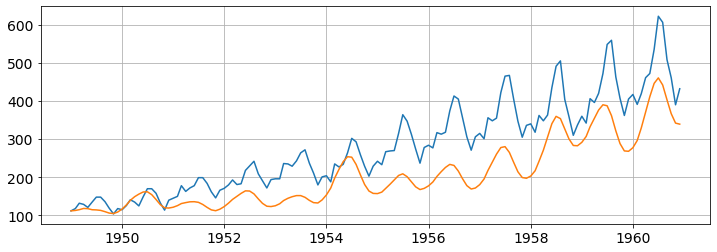

In [36]:
predictions_ARIMA= np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

In [37]:
indexedDataset_logScale

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [38]:
results_ARIMA.forecast(steps=120)


(array([6.09553391, 6.15281403, 6.2244297 , 6.29241111, 6.3416473 ,
        6.36359377, 6.35784699, 6.33139313, 6.29597544, 6.26447712,
        6.2473832 , 6.25025165, 6.27275832, 6.30940312, 6.35151498,
        6.38988664, 6.41727392, 6.43011064, 6.42906696, 6.4184249 ,
        6.40456151, 6.39403607, 6.39183072, 6.40019494, 6.41833686,
        6.44295406, 6.46937438, 6.49293991, 6.51024124, 6.51989037,
        6.52267578, 6.52112382, 6.51864518, 6.51853678, 6.5231191 ,
        6.5332235 , 6.54812862, 6.56591553, 6.58410307, 6.60036539,
        6.61313265, 6.62192778, 6.62737782, 6.63093119, 6.63438676,
        6.63937971, 6.64696491, 6.65739828, 6.67015315, 6.68414243,
        6.6980662 , 6.71077894, 6.72157725, 6.73033974, 6.73749799,
        6.74386365, 6.75037307, 6.75782576, 6.76668666, 6.77699808,
        6.78841306, 6.80032841, 6.81207183, 6.82308748, 6.83307123,
        6.84202478, 6.85022296, 6.85811203, 6.86617322, 6.87479132,
        6.88416284, 6.89426366, 6.90487872, 6.91

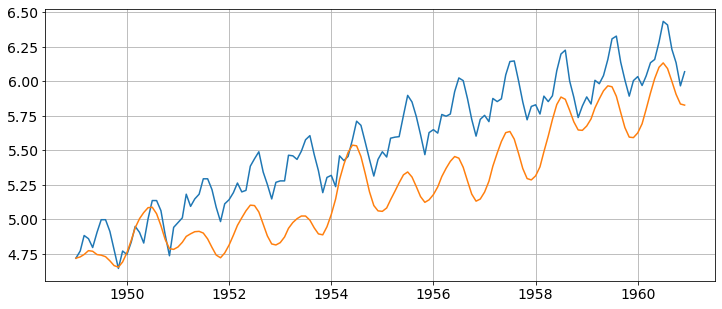

In [40]:
plt.figure(figsize=(12,5))
plt.plot(indexedDataset_logScale)
plt.plot(predictions_ARIMA_log)

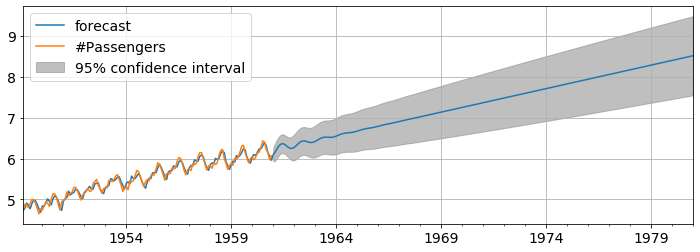

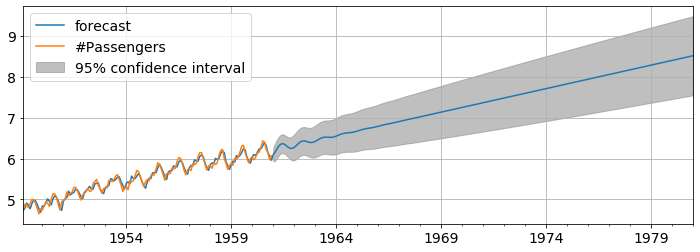

In [41]:
results_ARIMA.plot_predict(1,384)

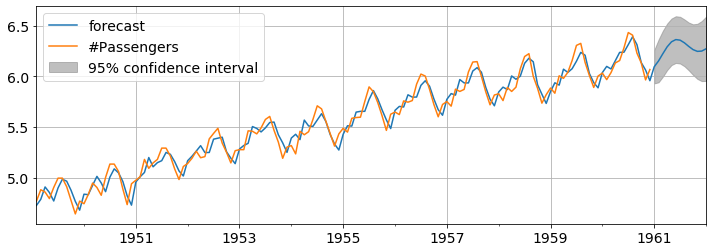

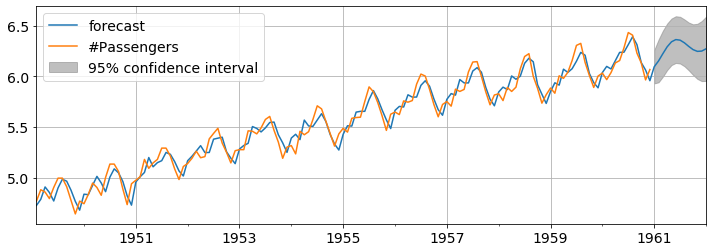

In [42]:
results_ARIMA.plot_predict(1,156)